In [21]:
import pandas as pd
import keras

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train['Sex'] = train["Sex"].replace(['male', 'female'], [0, 1])
train['Embarked'] = train['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3])

test["Sex"] = test["Sex"].replace(['male', 'female'], [0, 1])
test['Embarked'] = test['Embarked'].replace(['C', 'Q', 'S'], [1, 2, 3])

median_age = train['Age'].median()

train['Age'] = train['Age'].fillna(median_age)
test['Age'] = train['Age'].fillna(median_age)

test['Fare'] = test['Fare'].fillna(test['Fare'].median())

X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

y_train = train[['Survived']]

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [13]:
import matplotlib.pyplot as plt

def plot_history(history: keras.callbacks.History):
  """
  plot the training and validation loss for each training epoch

  history: a History object, output of the .fit method of a keras model
  """
  n = len(history.history['loss'])
  plt.plot(np.arange(n), history.history['loss'], label="training loss")
  plt.plot(np.arange(n), history.history['val_loss'], label="validation loss")
  plt.xticks(range(0, n + 1, 2))
  plt.legend()
  plt.grid()
  plt.show()

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.6600 - accuracy: 0.6617 - val_loss: 0.6230 - val_accuracy: 0.6222
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6742 - val_loss: 0.5916 - val_accuracy: 0.6222
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6579 - val_loss: 0.5508 - val_accuracy: 0.6889
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.6916 - val_loss: 0.5352 - val_accuracy: 0.7111
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6053 - accuracy: 0.6979 - val_loss: 0.5503 - val_accuracy: 0.6556
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.6879 - val_loss: 0.4882 - val_accuracy: 0.7778
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7041 - val_loss: 0.4845 - val_accuracy: 0.7889
Epoch 8/100
4

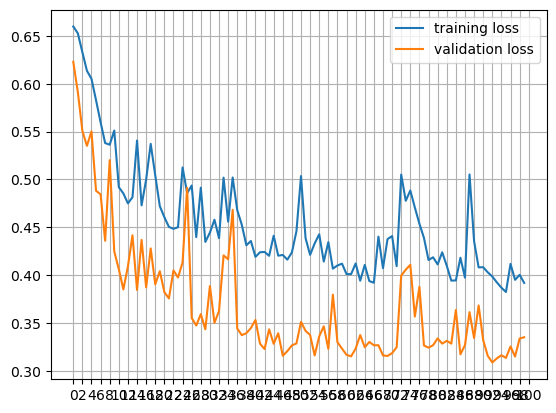

In [24]:
from keras import Sequential
from keras.layers import Input, Activation, Dense

model = Sequential()
model.add(Input(shape=(6)))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=.1)

plot_history(history)

In [27]:
y_pred = model.predict(X_test)
y_pred = list(map(lambda x : 1 if x >= 0.5 else 0 ,y_pred))
result = pd.DataFrame(test['PassengerId'], columns=['PassengerId'])
result = result.assign(survived=y_pred)
result.to_csv("submit_neural_net.csv", index=False)

14/14 [==============================] - 0s 2ms/step
